In [1]:
import json, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
files = {}
for file in os.listdir():
  if file.endswith('_results.csv'):
    files[file] = ''

for file in os.listdir():
  if file.endswith('.csv') and file.startswith('true-pref'):
    for file2 in files:
      if file2.split('_results')[0] == file.split('true-pref_')[1].split('_queries')[0]:
        files[file2] = file
    
for file in files:
  if files[file] == '':
    print('No results file found for', file)

In [7]:
for key in sorted(files):
  print(key, files[key])

Llama-3.2-1B_results.csv true-pref_Llama-3.2-1B_queries=1.csv
Undial-gretelaifull_10perc_results.csv true-pref_Undial-gretelaifull_10perc_queries=1.csv
Undial-gretelaifull_20perc_results.csv true-pref_Undial-gretelaifull_20perc_queries=1.csv
Undial-gretelaifull_40percent_results.csv true-pref_Undial-gretelaifull_40percent_queries=1.csv
classifier-v2_results.csv true-pref_classifier-v2_queries=1.csv
undial-AT-GretelAiComplete-v2_results.csv true-pref_undial-AT-GretelAiComplete-v2_queries=1.csv
undial-AT-GretelAiComplete_results.csv true-pref_undial-AT-GretelAiComplete_queries=1.csv


In [ ]:
performance_map = {}
for key in files:
  
  df_test = pd.read_csv(key)
  df_piis = pd.read_csv(files[key])
  

  true_labels = df_piis['true_piis'].astype(str).apply(lambda x: x.lower().strip())
  predicted_labels = df_piis['predicted_piis'].astype(str).apply(lambda x: x.lower().strip())  

  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  predicted_labels.replace("\n", "").replace("\t", "")
  true_labels.replace("\n", "").replace("\t", "")

  total_extractions = 0
  extractions = []
  for label, prediction in zip(true_labels, predicted_labels):
    label = label.strip()
    if label in prediction and len(label) > 3:
      total_extractions +=1
      extractions.append(label)
  piis_accuracy = total_extractions/len(true_labels)
  print(key, total_extractions, piis_accuracy)
  print(key, len(set(extractions)), len(set(extractions)) / len(set(true_labels)))

  true_labels = df_test['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df_test['predicted_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  f1 = f1_score(true_labels, predicted_labels, average='weighted')

  correct = 0
  for label, prediction in zip(true_labels, predicted_labels):
    if label in prediction:
      correct += 1
  accuracy = correct / len(true_labels)
  print(f"Accuracy: {accuracy}")

  performance_map[key.split('_result')[0]] = {
    'PIIS accuracy': piis_accuracy,
    'F1': f1
  }


Undial-gretelaifull_40percent_results.csv 9889 0.10312105696737124
Undial-gretelaifull_40percent_results.csv 4969 0.12334003524710205
Accuracy: 0.7653061224489796
undial-AT-GretelAiComplete_results.csv 6401 0.06674869912510298
undial-AT-GretelAiComplete_results.csv 3847 0.09548986025268696
Accuracy: 0.5500637755102041
undial-AT-GretelAiComplete-v2_results.csv 8404 0.0876356924617037
undial-AT-GretelAiComplete-v2_results.csv 4522 0.11224464467446074
Accuracy: 0.8112244897959183
Undial-gretelaifull_20perc_results.csv 10250 0.10688551258120692
Undial-gretelaifull_20perc_results.csv 5097 0.1265172388115273
Accuracy: 0.7815688775510204
Llama-3.2-1B_results.csv 9589 0.09999270050157982
Llama-3.2-1B_results.csv 5162 0.128130662496587
Accuracy: 0.11666666666666667
Undial-gretelaifull_10perc_results.csv 10447 0.10893979999374329
Undial-gretelaifull_10perc_results.csv 5172 0.12837888152505772
Accuracy: 0.7346938775510204
classifier-v2_results.csv 14846 0.11278583909443136
classifier-v2_results.c

In [11]:
performance_map

{'Undial-gretelaifull_40percent': {'PIIS accuracy': 0.10312105696737124,
  'F1': np.float64(0.782519302295692)},
 'undial-AT-GretelAiComplete': {'PIIS accuracy': 0.06674869912510298,
  'F1': np.float64(0.6224838491786442)},
 'undial-AT-GretelAiComplete-v2': {'PIIS accuracy': 0.0876356924617037,
  'F1': np.float64(0.851166110177096)},
 'Undial-gretelaifull_20perc': {'PIIS accuracy': 0.10688551258120692,
  'F1': np.float64(0.8154074894662182)},
 'Llama-3.2-1B': {'PIIS accuracy': 0.09999270050157982,
  'F1': np.float64(0.19700362898697216)},
 'Undial-gretelaifull_10perc': {'PIIS accuracy': 0.10893979999374329,
  'F1': np.float64(0.7535851672780253)},
 'classifier-v2': {'PIIS accuracy': 0.11278583909443136,
  'F1': np.float64(0.824089601686237)}}

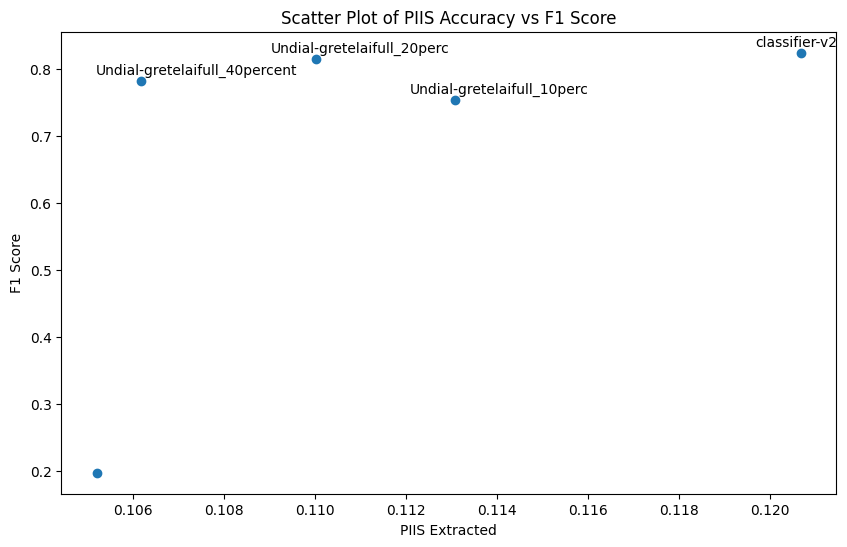

In [7]:
names = list(performance_map.keys())
accuracies = [performance_map[name]['PIIS accuracy'] for name in names]
f1s = [performance_map[name]['F1'] for name in names]

plt.figure(figsize=(10, 6))
plt.scatter(accuracies, f1s)

for i, model in enumerate(names):
  plt.annotate(model, (accuracies[i] - 0.001, f1s[i]+ 0.01))

plt.xlabel("PIIS Extracted")
plt.ylabel("F1 Score")
plt.title("Scatter Plot of PIIS Accuracy vs F1 Score")
plt.show()

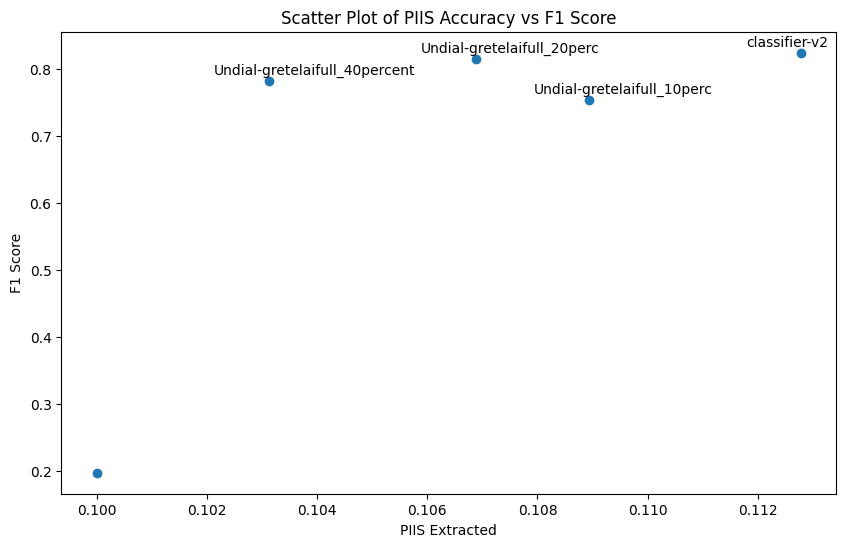

In [12]:
names = list(performance_map.keys())
accuracies = [performance_map[name]['PIIS accuracy'] for name in names]
f1s = [performance_map[name]['F1'] for name in names]

plt.figure(figsize=(10, 6))
plt.scatter(accuracies, f1s)

for i, model in enumerate(names):
  plt.annotate(model, (accuracies[i] - 0.001, f1s[i]+ 0.01))

plt.xlabel("PIIS Extracted")
plt.ylabel("F1 Score")
plt.title("Scatter Plot of PIIS Accuracy vs F1 Score")
plt.show()

In [ ]:
performance_map = {}
for key in files:
  
  df_test = pd.read_csv(key)
  df_piis = pd.read_csv(files[key])

  piis_unique = []
  for _, row in df_piis.iterrows():
    if str(row['true_piis']).lower() in str(row['predicted_piis']).lower():
      piis_unique.append(str(row['true_piis']).lower())
  piis_unique = list(set(piis_unique))
  piis_accuracy = len(piis_unique) / len(df_piis)

  true_labels = df_test['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df_test['predicted_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  f1 = f1_score(true_labels, predicted_labels, average='weighted')

  performance_map[key.split('_result')[0]] = {
    'PIIS accuracy': piis_accuracy,
    'F1': f1
  }


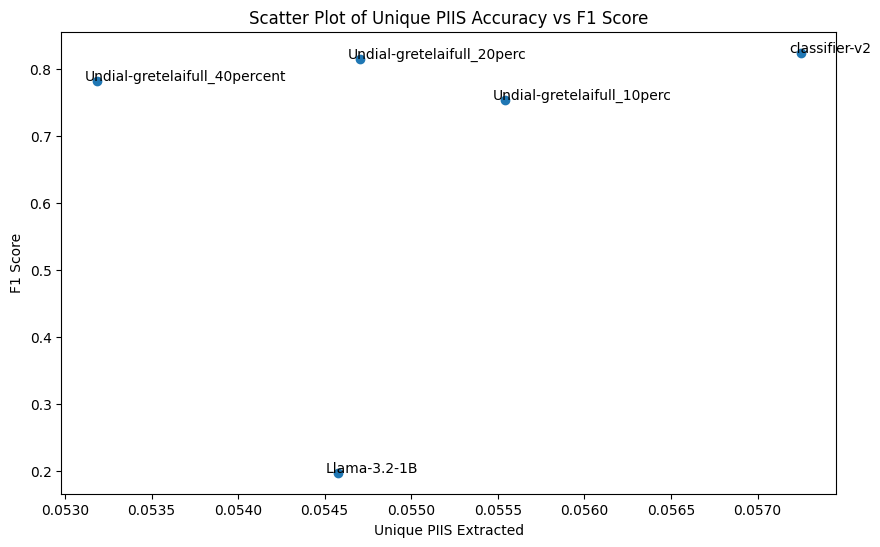

In [10]:
names = list(performance_map.keys())
accuracies = [performance_map[name]['PIIS accuracy'] for name in names]
f1s = [performance_map[name]['F1'] for name in names]

plt.figure(figsize=(10, 6))
plt.scatter(accuracies, f1s)

for i, model in enumerate(names):
  plt.annotate(model, (accuracies[i] - 0.00007, f1s[i]+ 0.001))

plt.xlabel("Unique PIIS Extracted")
plt.ylabel("F1 Score")
plt.title("Scatter Plot of Unique PIIS Accuracy vs F1 Score")
plt.show()

In [ ]:
performance_map = {}
for key in files:
  
  df_test = pd.read_csv(key)
  df_piis = pd.read_csv(files[key])

  true_labels = df_test['true_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = df_test['predicted_label'].astype(str).apply(lambda x: x.lower())
  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  f1 = f1_score(true_labels, predicted_labels, average='weighted')

  true_labels = df_piis['true_piis'].astype(str).apply(lambda x: x.lower().strip())
  predicted_labels = df_piis['predicted_piis'].astype(str).apply(lambda x: x.lower().strip())  

  predicted_labels = predicted_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  true_labels = true_labels.apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

  predicted_labels.replace("\n", "").replace("\t", "")
  true_labels.replace("\n", "").replace("\t", "")


  unique_extractions = []
  memorized = 0
  for label, prediction in zip(true_labels, predicted_labels):
    label = label.strip()
    if label in prediction and len(label) > 3:
      if label not in unique_extractions:
        unique_extractions.append(label)
  
  piis_accuracy = len(set(unique_extractions)) / len(set(true_labels))

  print(key, len(set(unique_extractions)), piis_accuracy)

  performance_map[key.split('_result')[0]] = {
    'PIIS accuracy': piis_accuracy,
    'F1': f1
  }


Undial-gretelaifull_40percent_results.csv 4969 0.12334003524710205
Undial-gretelaifull_20perc_results.csv 5097 0.1265172388115273
Llama-3.2-1B_results.csv 5162 0.128130662496587
Undial-gretelaifull_10perc_results.csv 5172 0.12837888152505772
classifier-v2_results.csv 7248 0.13860628776868356


In [17]:
performance_map

{'Undial-gretelaifull_40percent': {'PIIS accuracy': 0.12334003524710205,
  'F1': np.float64(0.782519302295692)},
 'Undial-gretelaifull_20perc': {'PIIS accuracy': 0.1265172388115273,
  'F1': np.float64(0.8154074894662182)},
 'Llama-3.2-1B': {'PIIS accuracy': 0.128130662496587,
  'F1': np.float64(0.19700362898697216)},
 'Undial-gretelaifull_10perc': {'PIIS accuracy': 0.12837888152505772,
  'F1': np.float64(0.7535851672780253)},
 'classifier-v2': {'PIIS accuracy': 0.13860628776868356,
  'F1': np.float64(0.824089601686237)}}

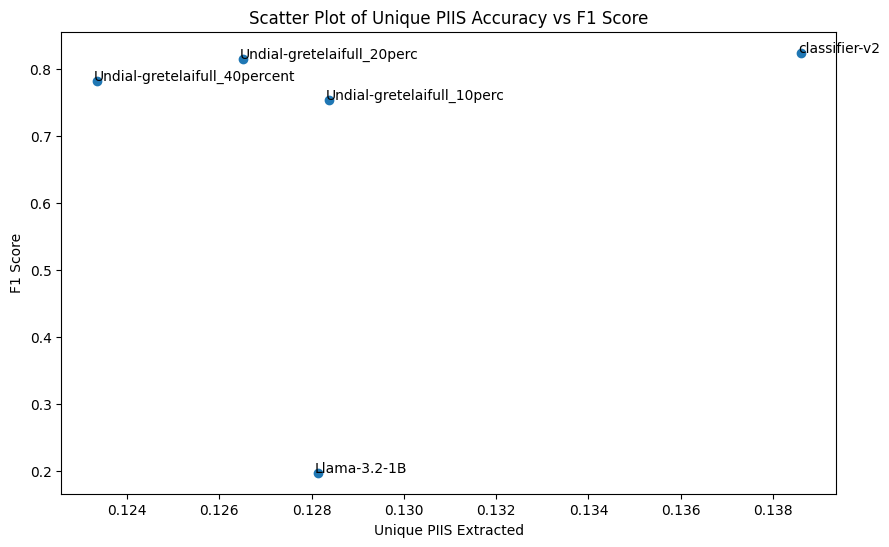

In [18]:
names = list(performance_map.keys())
accuracies = [performance_map[name]['PIIS accuracy'] for name in names]
f1s = [performance_map[name]['F1'] for name in names]

plt.figure(figsize=(10, 6))
plt.scatter(accuracies, f1s)

for i, model in enumerate(names):
  plt.annotate(model, (accuracies[i] - 0.00007, f1s[i]+ 0.001))

plt.xlabel("Unique PIIS Extracted")
plt.ylabel("F1 Score")
plt.title("Scatter Plot of Unique PIIS Accuracy vs F1 Score")
plt.show()